## Task 05
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap

In [3]:
US_data = pd.read_csv("B:\\6th sem\\Internship\\archive\\US_Accidents_March23.csv")

In [5]:
US_data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
US_data.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
US_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [11]:
US_data.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.069060,0.052862,0.083724,0.093190,0.034787,-0.020327,-0.070039,0.022293,0.042347,...,-0.004785,0.049890,-0.010352,-0.010303,-0.001678,-0.046032,-0.047106,-0.005502,-0.104901,NaN
Start_Lat,0.069060,1.000000,-0.067720,0.999993,-0.121743,0.064064,-0.443781,-0.480296,0.022364,-0.194094,...,0.002809,0.046600,-0.005312,0.002275,-0.001319,-0.050590,-0.003715,-0.004552,-0.064792,NaN
Start_Lng,0.052862,-0.067720,1.000000,-0.121735,0.999999,0.007851,-0.010652,-0.031810,0.179500,0.193185,...,0.025186,-0.034262,0.007632,-0.016957,0.000037,0.006239,-0.031081,-0.002103,0.070862,NaN
End_Lat,0.083724,0.999993,-0.121735,1.000000,-0.121732,0.067932,-0.468692,-0.489578,0.027849,-0.242143,...,0.012879,0.041223,-0.013982,0.002649,-0.002691,-0.110062,-0.013911,-0.010930,-0.047481,NaN
End_Lng,0.093190,-0.121743,0.999999,-0.121732,1.000000,0.005876,0.024084,0.006733,0.167428,0.216028,...,0.026358,-0.009776,0.012800,-0.012571,-0.000036,0.026145,-0.028812,-0.002327,0.052820,NaN
Distance(mi),0.034787,0.064064,0.007851,0.067932,0.005876,1.000000,-0.054082,-0.044309,0.008780,-0.093121,...,-0.009644,0.030164,-0.009509,-0.017251,-0.001439,-0.039792,-0.031564,-0.006047,-0.107457,NaN
Temperature(F),-0.020327,-0.443781,-0.010652,-0.468692,0.024084,-0.054082,1.000000,0.993744,-0.330939,0.109500,...,0.000694,-0.021417,0.007022,0.004571,0.000070,0.033638,0.008406,0.004947,0.047874,NaN
Wind_Chill(F),-0.070039,-0.480296,-0.031810,-0.489578,0.006733,-0.044309,0.993744,1.000000,-0.314731,0.086598,...,-0.002893,-0.030430,0.007955,0.005771,0.000255,0.039663,0.011614,0.006706,0.025507,NaN
Humidity(%),0.022293,0.022364,0.179500,0.027849,0.167428,0.008780,-0.330939,-0.314731,1.000000,0.115573,...,0.001534,0.000115,-0.008544,-0.001530,0.001115,-0.005542,-0.018117,-0.003507,-0.013867,NaN
Pressure(in),0.042347,-0.194094,0.193185,-0.242143,0.216028,-0.093121,0.109500,0.086598,0.115573,1.000000,...,0.007033,0.030465,-0.002753,0.014951,0.001279,0.036149,-0.006544,0.002045,0.039485,NaN


In [12]:
print(US_data.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [13]:
print(US_data.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [15]:
US_data['Start_Time'] = pd.to_datetime(US_data['Start_Time'])

In [16]:
US_data['Hour'] = US_data['Start_Time'].dt.hour
US_data['Weekday'] = US_data['Start_Time'].dt.day_name()

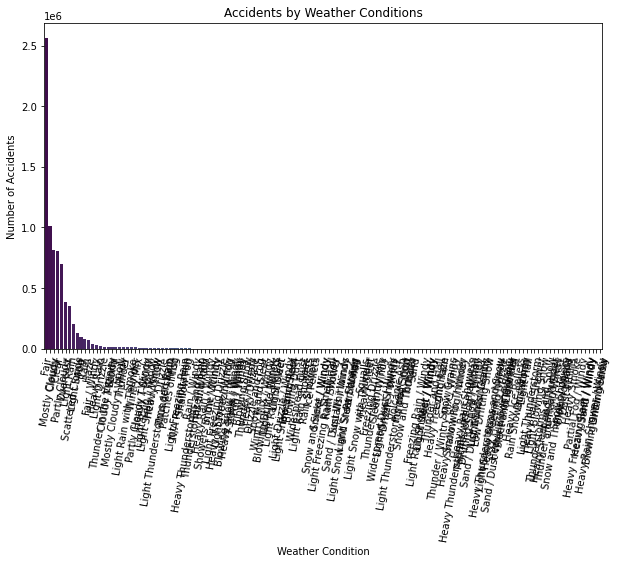

In [17]:
weather_conditions = US_data['Weather_Condition'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, palette='viridis')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=80)
plt.show()

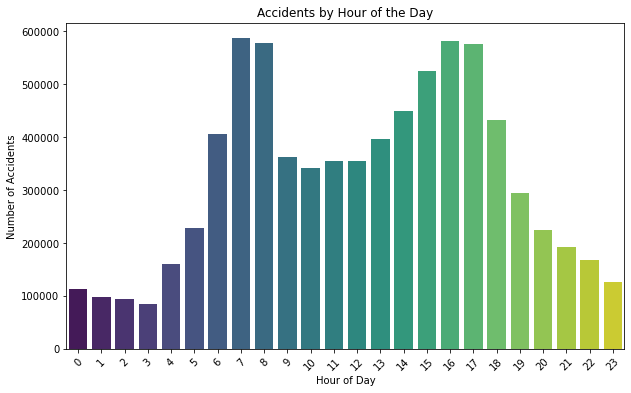

In [18]:
hourly_accidents = US_data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

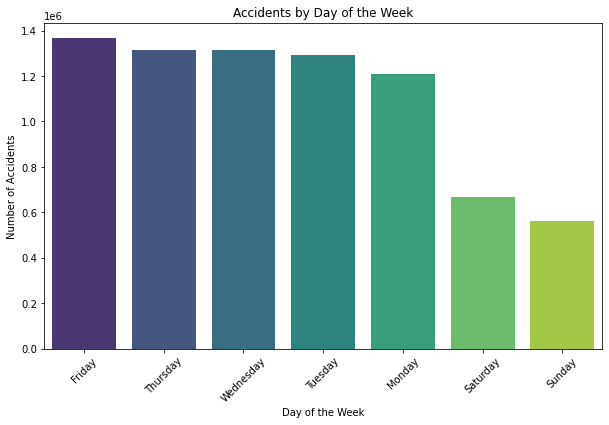

In [19]:
weekday_accidents = US_data['Weekday'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_accidents.index, y=weekday_accidents.values, palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

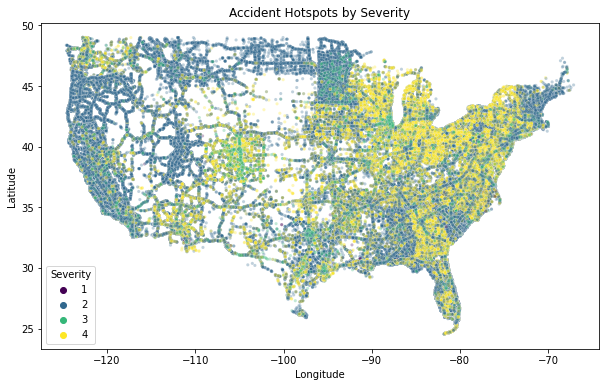

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=US_data['Start_Lng'], y=US_data['Start_Lat'], hue=US_data['Severity'], palette='viridis', s=10, alpha=0.3)
plt.title('Accident Hotspots by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()